In [1]:
import numpy as np
import pandas as pd

In [2]:
# Batches: Multiple instance to be trained together for efficiency
inputs = [[1,2,3,2.5],
          [2,5,-1,2],
          [-1.5,2.7,3.3,0.8]]

weights = [[0.2,0.8,-0.5,1.0],
		   [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]
biases = [2,3,0.5]

#Multiple batch of inputs . weights
# W = [[Wi]]
# Wi = combination of x to make i-th neuron of next layer
layer_outputs = np.dot(inputs, np.array(weights).T) + biases
# Each row is a different result of Input . weight
layer_outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 3.01 ,  0.251,  1.418]])

In [3]:
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

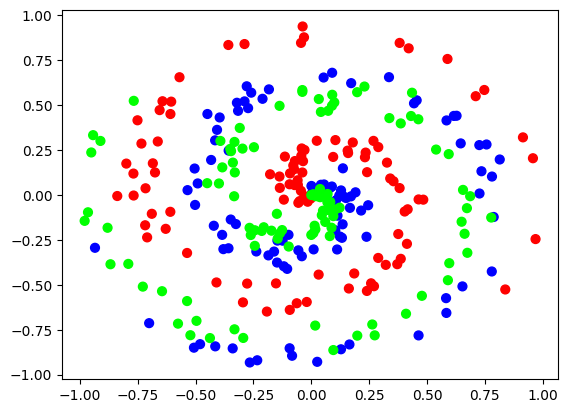

In [4]:
import matplotlib.pyplot as plt
x, y = spiral_data(samples=100, classes=3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [5]:
# Dense Layer Class

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
		# Init weights and biases
        # Start small so steps is substantial
        # Weight already in cols instead of rows, so no transpose needed
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


In [6]:
x,y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2,3)
dense1.forward(x)
# Each row is a differentt input
dense1.output


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.11171044e-04, -5.11007493e-05, -1.12099799e-04],
       [ 2.99257295e-06, -2.69126613e-04, -1.45165104e-04],
       [ 8.95101766e-05, -4.30442247e-04, -1.68079801e-04],
       [-3.49893759e-04, -3.07208364e-04, -4.33002861e-04],
       [-9.66546431e-05, -6.26290333e-04, -4.16209630e-04],
       [ 2.01383664e-04, -8.65946291e-04, -3.22013511e-04],
       [ 1.31309906e-04, -9.83604696e-04, -4.39481839e-04],
       [-1.06838241e-03, -1.50449079e-04, -8.90702126e-04],
       [-8.93245277e-04, -5.83468529e-04, -9.95412702e-04],
       [-1.12648751e-03, -4.92644438e-04, -1.12211821e-03],
       [-1.73822860e-03,  5.85809175e-04, -9.94148082e-04],
       [-9.05415392e-04, -1.05240732e-03, -1.26150739e-03],
       [-1.47099793e-03, -6.32181647e-04, -1.45919714e-03],
       [-1.94510783e-03, -1.25517283e-04, -1.54033152e-03],
       [-2.34599574e-03,  6.14237681e-04, -1.43838138e-03],
       [-2.51434790e-03,  7.29419931e-04

In [7]:

# Activate Function

In [8]:
# ReLU activation Class
class Activation_ReLU:
	def forward(self, inputs):
		# max(0, input)
		self.output = np.maximum(0, inputs)

# Soft_max activation Class
class Activation_Softmax:
	def forward(self, inputs):
		# exp(x) / sum(exp(x))
		# Subtract max to prevent impact of large value
		exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
		probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
		self.output = probabilities

In [ ]:
# Loss Function
# Log Loss = -log(pred of correct field) ~ -math.log(y_pred[class])

# If Input have outliers (1 or 0) => skew results => clip values

# Base Loss Class
class Loss:
    # calculate loss from inputs and targets
    def calculate(self, output, y):
        sample_losses = self.forward(output,y)
        data_losses = np.mean(sample_losses)  
        return data_losses

# Inherit from Loss Class
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
		# Number of samples
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # 2 situation, normal and one-hot-encoded
        if len(y_true.shape) ==1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) ==2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)




In [ ]:
# Accuracy
accuracy = np.mean(predictions == y)